### ¿Qué es la regresión lineal?
Es un modelo matemático que describe la relación que existe entre una (regresión lineal simple) o varias variables (regresión lineal múltiple), esta relación se expresa como una línea recta. Estos modelos son un procedimiento estadístico que permite predecir el futuro.

Debido a la imposibilidad de que la línea recta pase a través de todos los puntos de un gráfico se busca una ubicación óptima para la línea mediante la regresión lineal, algunos puntos seguirán lejos de la línea, pero serán mínimos. Calcular la distancia mínima entre la línea y cada punto se llama función de pérdida.

La ecuación de una línea recta tiene la siguiente forma: Y=β_0+β_1 X+ε lo que se traduce como “La variable independiente (Y) es igual a la suma de dos constantes desconocidas (β_0 representando el punto de intersección y β_1 representando el punto de la pendiente X) más la función de perdida (ε)”.

La regresión lineal múltiple encuentra la relación entre dos, o más, variables independientes y su correspondiente variable dependiente. Su fórmula es la siguiente: Y=β_0+β_1 X_1+⋯+β_α X_α+ε.

Este tipo de regresión ayuda a predecir tendencias y valores futuros. El análisis de regresión lineal múltiple permite determinar la influencia de las variables independientes sobre la variable dependiente.


### ¿Qué es la Regresión logística?
Es un modelo estadístico que describe la relación que existe entre una variable dependiente cualitativa, dicotómica (regresión logística binaria) o con más de dos valores (regresión logística multinomial). Este modelo a veces es denominado modelo logit en los textos de estadística.

La regresión logística es un algoritmo supervisado utilizado para la clasificación. El aprendizaje supervisado se caracteriza por el uso de conjuntos de datos etiquetados, que son la esencia del proceso, ya que con ellos se implementará un algoritmo que permitirá realizar las siguientes tareas de predicción y clasificación.
Los pasos para la Función de Respuesta Lógica son:
1.	Denominar la variable dependiente como y
2.	Establecer la probabilidad máxima de variable como P (y = 1)
3.	Tener que el caso negativo tiene una probabilidad de: P (y = 0) que es lo mismo que: 1 -P (y = 1)
4.	Poder añadir variables independientes x1,x2,...,xk
5.	Usar la Función de Respuesta Logística
6.	Con la transformación obtener: P(y=1)=1/(1+e^(-(β_o+β_1 x_1+β_2 x_2+⋯+β_k x_k)) )


### Ejercicio de regresión logística en Python
En este ejercicio se usan algoritmos de Machine Learning (ML) en Python para resolver un problema donde un conjunto de datos de entrada dará una salida que será discreta, razon por la cual se utiliza la regresión logística y no la regresión lineal.

En el ejercicio se usa un archivo tipo CSV (Comma Separated Values) el cual es un archivo de texto simple que almacena datos en forma de tabla, solo contiene letras, números y un delimitador que suele ser una coma. Este archivo tiene los datos de entrada para clasificar si el usuario que visita un sitio web usa como sistema operativo Windows, Macintosh o Linux.

La información de entrada, tomada de Google Analytics, es la siguiente:

- Duración de la visita (en segundos)
- Cantidad de páginas visitadas durante la sesión
- Cantidad de acciones del usuario (clic, scroll, etc.)
- Suma del valor de las acciones

Como la salida es discreta, se les asignaran valores a las etiquetas:
0.	Windows
1.	Macintosh
2.	Linux

La pequeña muestra de 170 registros será usada para comprender el ejercicio, pero en una muestra real, con la finalidad de conseguir mejores resultados, se debe contar con un número mayor de registros para lograr obtener una mayor exactitud en las predicciones y evitar problemas de overfitting o underfitting.

### Importación de librerías

In [10]:
#El código empieza con la importación de librerías necesarias para poder desarrollar el ejercicio:

import pandas as pd #Pandas ofrece herramientas para el manejo, análisis y procesamiento de datos, basándose en la estructura de datos o arrays de la librería Numpy
import numpy as np #Se especializa en el cálculo numérico y el análisis de datos de una manera mucho más rápido que las listas de Python

#sklearn unifica bajo un único marco los principales algoritmos y funciones, facilita las etapas de preprocesado, entrenamiento, optimización y validación de modelos predictivos
from sklearn import linear_model #Es un módulo que contiene diferentes funciones para realizar aprendizaje automático con modelos lineales
from sklearn import model_selection #Es un módulo que roporciona varias funciones para dividir datos en conjuntos de entrenamiento y prueba

#sklearn.metrics implementa funciones que evalúan el error de predicción para propósitos específicos
from sklearn.metrics import classification_report #Se utiliza para crear un informe de texto que muestre las principales métricas de clasificación
from sklearn.metrics import confusion_matrix #Se utiliza para calcular la matriz de confusión para evaluar la precisión de una clasificación
from sklearn.metrics import accuracy_score #Se utiliza para obtener la puntuación de clasificación de precisión

#Matplotlip se especializa en la creación de graficas enriquecidas que se adaptan a todo tipo de datasets y permite una personalización profunda
import matplotlib.pyplot as plt #Es una interfaz basada en estado con un trazado similar a MATLAB

import seaborn as sb #Permite generar elegantes e informativos gráficos a partir de un conjunto de datos
#%matplotlib inline #Es una función que representa la figura en una notebook

### Identificación del Sistema Operativo de los usuarios

En la primera línea se puede observar un DataFrame es una estructura bidimensional de Pandas que almacena datos en forma de tabla, con filas y columnas etiquetadas.

Como en este ejercicio el archivo que usaremos es tipo .csv se usara la función **read_csv( )**, dentro de este se puede especificar el nombre o la ruta del archivo, así como agregar el carácter delimitador, el nombre de las columnas, entre otras cosas. Esta función utiliza muchos argumentos, los principales son:

**Syntaxis usual: pd.read_csv(filepath_or_buffer, sep=‘,’, names=none, index_col=none, skipinitialspace=false)**

*‘filepath_or_buffer’ indica la unicacion del archive csv.*<br>
*‘sep’ indica el carácter (o expresión regular) que se va a tratar como delimitador.*<br>
*‘names’ es la secuencia de etiquetas de columnas que se aplicarán.*<br>
*‘index_col’ indica que columnas se utilizarán como etiquetas de fila mediante etiquetas de columna o índices de columna.*<br>
*‘skipinitialspace’ indica si salta espacios después del delimitador.*<br>

En la segunda línea se la función **head( )** la cual devuelve las primeras n filas del objeto, el número predeterminado de elementos para mostrar es cinco, si se desea más o menos filas se necesita especificar.


In [11]:

dataframe = pd.read_csv(r"usuarios_win_mac_lin.csv")
dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


La función **describe( )** calcula una variedad de estadísticas resumidas sobre una serie o las columnas de un DataFrame (excluyendo las vacías).

**Syntaxis: DataFrame.describe(percentiles=none, include=none, exclude=none, datetime_is_numeric=false)**

*‘percentiles’ indica los percentiles a incluir en la salida.*<br>
*‘include’ y ‘exclude’ especifican los tipos de datos a incluir o excluir en la salida.*<br>
*‘datetime_is_numeric’ indica si se deben tratar los tipos de datos datetime como numéricos.*<br>


In [12]:
dataframe.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


La función **groupby( )** se utiliza para agrupar los datos según las categorías y aplicar una función a las categorías. También ayuda a agregar datos de manera eficiente. Hace que la tarea de dividir el marco de datos según algunos criterios sea fácil y eficiente.

**Syntax: DataFrame.groupby(by=none, axis=0, level=none, as_index=true, sort=true, group_keys=true, squeeze=false, observed=false)**

*‘by’ es el mapeo, función, cadena, label o iterable para agrupar elementos.*<br>
*‘axis’ indica si se agrupa junto con la fila (axis=0) o la fila (axis=1).*<br>
*‘level’ es un valor para agrupar por un nivel o niveles particulares.*<br>
*‘as_index’ devuelve un objeto con etiquetas de grupo como índice.*<br>
*‘sort’ ordena las claves de grupo. ‘group_keys’ añade claves de grupo a los índices para identificar las piezas.*<br>
*‘squeeze’ disminuye la dimensión del retorno cuando es posible.*

El criterio usado para esta parte del ejercicio fue la del grupo ‘clase’ en donde se imprimieron los valores encontrados con la función **print( )**.


In [13]:
print(dataframe.groupby('clase').size()) #extraigo cuantos datos por clase

clase
0    86
1    40
2    44
dtype: int64


### Visualización de datos

La función **drop( )** se utiliza para eliminar filas o columnas especificadas, cuando se utiliza un índice múltiple, las etiquetas en diferentes niveles se pueden eliminar especificando el nivel.

**Syntaxis: DataFrame.drop(labels=none, axis=0, index=none, columns=none, level=none, inplace=false, errors='raise')**

*‘labels’ representa la etiqueta de índice o columna para soltar.*<br>
*‘index’ es una alternativa a especificar axis (labels, axis=0 es el equivalente a index=labels).*<br>
*‘columns’ es una alternativa a especificar axis (labels, axis=1 es el equivalente a columns=labels).*<br>
*‘implace’ si es falso, devuelva una copia. ‘errors’ si es "ignorar", suprime el error y solo se eliminan las etiquetas existentes.*

Los objetos en Pandas tienen una serie de atributos que le permiten acceder a los metadatos. El atributo axis (eje) afecta las filas y columnas, en algunos entornos de trabajo es necesario agregar este atributo para poder visualizar la muestra de manera correcta como es en el caso de Visual Studio Code.

La función **hist( )** se utiliza para crear un histograma por cada columna del DataFrame.

**Syntaxis: DataFrame.hist(column=none, by=none, grid=true, xlabelsize=none, xrot=none, ylabelsize=none, yrot=none, ax=none, figsize=none, layout=none, bins=10, legend=false)**

*‘grid’ sirve para mostrar las líneas de la cuadrícula del eje.*<br>
*‘xlabelsize’ o ‘ylabelsize’ cambia el tamaño de la etiqueta del eje x o y.*<br>
*‘xrot’ o ‘yrot’ rota las etiquetas del eje x o y. ‘ax’ indica los ejes sobre los que trazar el histograma.*<br>
*‘figsize’ indica el tamaño (pulgadas) de la figura a crear.*


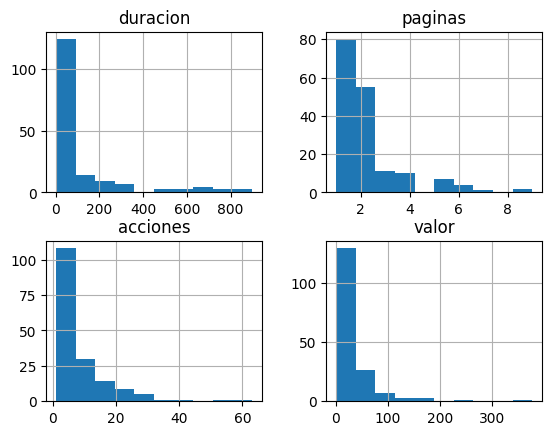

In [17]:
dataframe.drop(['clase'],axis=1).hist()
#En esta parte se agregó la sentencia 'axis' para especificar que la variable siguiente hace referencia al eje (numero de columnas) que predeterminadamente su valor es 0
plt.show()

La función pairplot( ) se utiliza para trazar múltiples distribuciones bivariados por pares en un conjunto de datos. Esta función utiliza muchos argumentos, los principales son:

**Syntaxis usual: sb.pairplot(data=DataFrame, hue=none, hue_order=none, palette=none, vars=none, x_vars=none, y_vars=none, dropna=false, kind=reg)**

*‘data’ es un marco de datos ordenado donde cada columna es una variable y cada fila es una observación.*<br>
*‘hue’ indica la variable en "datos" para asignar aspectos de la trama a diferentes colores.*<br>
*‘palette’ es un conjunto de colores para mapear la variable ‘hue’.*<br>
*‘vars’ son las variables dentro de "datos" para usar por separado para<br> las filas y columnas de la figura.*
*‘dropna’ elimina los valores faltantes de los datos antes de trazar.*<br>
*‘kind’ indica el tipo de trama a hacer.*


C:\Users\kurat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\kurat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kurat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users

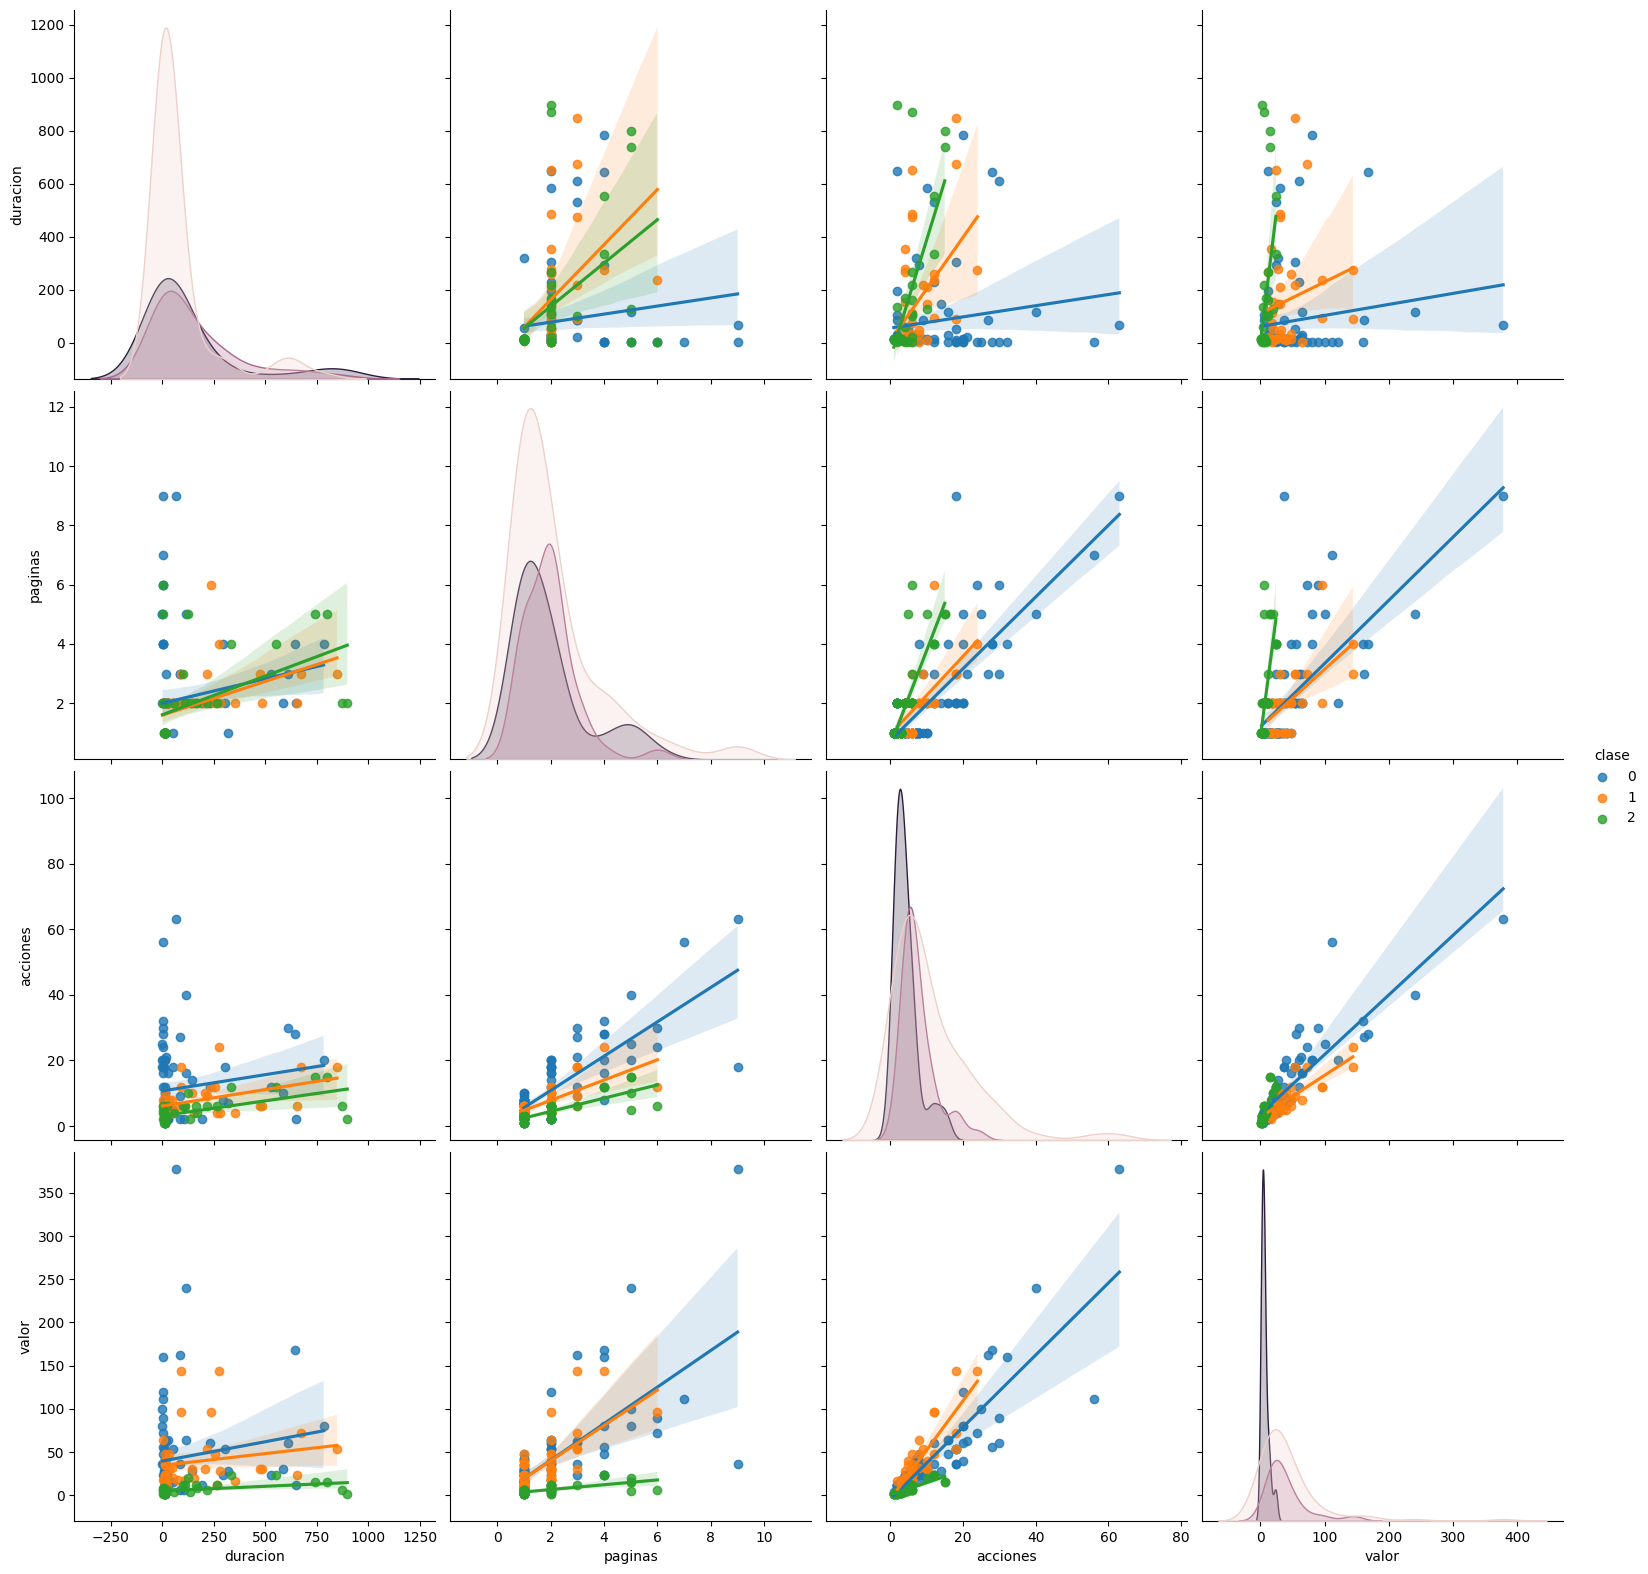

In [11]:
sb.pairplot(dataframe.dropna(), hue='clase',size=4,vars=["duracion", "paginas","acciones","valor"],kind='reg')

### Creación del Modelo de Regresión Logística

La función **array( )** se utiliza para la creación de matrices con elementos homogéneos, esto último se debe a que esta lista no está siendo creada por medio Python, sino por la librería Numpy la cual permitirá la realización de operaciones matemáticas sobre las matrices. Esta función utiliza muchos argumentos, los principales son:

**Syntaxis usual: numpy.array(object, dtype=none, copy=true, order='K', subok=false, ndmin=0, like=none)**

*‘object’ indica a cualquier objeto que exponga la interfaz de la matriz o secuencia (anidada).*<br>
*‘dtype’ indica el tipo de dato deseado para la matriz.*<br>
*‘copy’ indica si se copia el objeto, por defecto se copia.*<br>
*‘order’especifica el diseño de la memoria de la matriz.*

Para la creación del modelo de regresión logística se carga primero las variables de las 4 columnas de entrada en X excluyendo la columna [‘clase’] con **drop( )** y se agrega la columna recién eliminada a la variable y.

El atributo **.shape** para matrices Numpy devuelve las dimensiones de la matriz. Si X tiene ‘n’ filas y ‘m’ columnas, entonces ‘X.shape’ es (n,m). En el caso del ejercicio se conoce que nuestra muestra posee un total de 170 registros por 4 columnas.


In [19]:
X = np.array(dataframe.drop(['clase'],axis=1))
y = np.array(dataframe['clase'])
X.shape

(170, 4)

El módulo **sklearn.linear_model.LogisticRegression** es utilizado para implementar la regresión logística.

**Syntaxis: linear_model.LogisticRegression(penalty='l2', dual=false, tol=0.0001, C=1.0, fit_intercept=true, intercept_scaling=1, class_weight=none, random_state=none, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=false)**

*‘dual’ indica si la formación es dual o primaria.*<br>
*‘tol’ es la tolerancia a los criterios de parada.*<br>
*‘random_state’ se utiliza cuando solver=='sag', 'saga' o 'liblinear' para mezclar los datos.*<br>
*‘max_iter’ indica el número máximo de iteraciones necesarias para que los solucionadores converjan.*

En el caso del ejercicio, debido a que la colisión no se logró con la cantidad de iteraciones por defecto (100), se tuvo que aumentar la cantidad de iteraciones a 1000.

La función **fit( )** se utiliza para ajustar modelo de acuerdo con los datos de entrenamiento proporcionados.

**Syntaxis: fit(X, y, sample_weight =none)**

*‘X’ indica el vector de entrenamiento, donde n_samples es el número de muestras y n_features es el número de características.*<br>
*‘y’ indica el vector objetivo relativo a X.*<br>
*‘sample_weight’ es la matriz de pesos que se asignan a muestras individuales, por defecto cada muestra tiene un peso unitario.*

In [21]:
model = linear_model.LogisticRegression(max_iter=1000)
#aqui tuve que agregar la sentencia de max_iter=1000 debido a que la cantidad de intentos por defecto (100) no fueron suficientes para hayar la colision
model.fit(X,y)

LogisticRegression(max_iter=1000)

La función **predict( )** se utiliza para predecir etiquetas de clase para muestras en X. Su atributo ‘X’ indica la matriz de datos para la que queremos obtener las predicciones:

**Sintaxis: predict(X)**

En la primera línea guardamos en predictions el resultado del método **predict( )**.

En la segunda línea se observa cómo se imprimen las salidas de predictions, en algunos entornos de trabajo los corchetes, en nuestro caso [0:5], se puede hallar ya sea dentro o fuera de **print( )**, por ejemplo: *print(predictions)[0:5]*

In [31]:
predictions = model.predict(X)
print(predictions[0:5])
#Dependiendo del entorno de trabajo la linea anterior se puede escribir de la siguiente forma "print(predictions)[0:5]"

[2 2 2 2 2]


La función **score( )** se utiliza para devolver la precisión media de los datos y etiquetas de prueba proporcionados. En la clasificación de etiquetas múltiples, esta es la precisión del subconjunto, que es una métrica estricta, ya que para cada muestra es necesario que cada conjunto de etiquetas se prediga correctamente. Sus atributos son los mismos que el método fit( ).

**Syntaxis: score(X, y, sample_weight=none)**

Entonces lo que estamos haciendo aquí es confirmar que tan bueno es el modelo que estamos utilizando, siendo este del 77%

In [32]:
model.score(X,y)

0.7764705882352941

### Validación del modelo

En la siguientes tres líneas se realiza la subdivisión de los datos de entrada de manera aleatoria en donde el 80% de los registros serán usados para entrenamiento y el 20% restante para la validación.

En la primera línea asignamos el rango de validación y en la segunda asignamos un número para la semilla, ambos elementos nos servirán en la tercera línea.

La función **model_selection.train_test_split( )** divide arrays o matrices en entrenamiento aleatorio y subconjuntos de pruebas. Esta función es de utilidad rápida ya que incluye la validación de entrada, **next(ShuffleSplit( ).split(X, y))**, y la aplicación para ingresar datos en una sola llamada para dividir (y opcionalmente submuestrear) datos en una sola línea.

**Syntaxis: model_selection.train_test_split(arrays, test_size=none, train_size=none, random_state=none, shuffle=true, stratify=none)**

*‘arrays’ permite como entradas las listas, matrices numpy, matrices scipy-sparse o marcos de datos pandas.*<br>
*‘test_size’ si es float, debe estar entre 0,0 y 1,0 y representar la proporción del conjunto de datos que se incluirá en la división de prueba, si es int, representa el número absoluto de muestras de prueba y si es none, el valor se establece en el complemento del tamaño del tren (si train_size también es none, se establecerá en 0,25).*<br>
*‘train_size’ es igual a test_size en cuento a float e int, pero en none el valor se establece automáticamente en el complemento del tamaño de la prueba.*
*‘random_state’ controla la mezcla aplicada a los datos antes de aplicar la división.*<br>
*‘shuffle’ indica si se deben mezclar o no los datos antes de dividirlos, si es false ‘stratify’ debe ser none debido a que este atributo divide los datos de forma estratificada.*

En la última línea se utiliza la función anterior junto con los elementos validation_size y seed para asígnalos a test_size y random_state respectivamente, el resultado de la subdivisión se alojará en X_train, X_validation, Y_train y Y_validation.

In [33]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

Después se vuelve a compilar el modelo de Regresión Logística solo que ahora utilizando el 80% de los datos de entrada (los que usaremos para entrenamiento), como la cantidad de datos de entrada cambio se tiene que calcular nuevamente el scoring. En la primera línea asignamos un nombre al string name, este servirá para imprimirlo en la cuarta línea.

La función **model_selection.KFold( )** es un validador de cruzados que proporciona índices de entrenamiento/prueba para dividir datos en conjuntos de entrenamiento/prueba. Divide el conjunto de datos en k-flods consecutivos (sin barajar de forma predeterminada). Luego, cada fold se usa una vez como validación, mientras que los k-1 pliegues restantes forman el conjunto de entrenamiento.

**Syntaxis: model_selection.KFold(n_splits=5, shuffle=false, random_state=none)**

*‘n_splits’ indica el número de pliegues, deben ser al menos 2.*<br>
*Aquí ‘shuffle’ esta por default en false, este indica si se deben mezclar los datos antes de dividirlos en lotes teniendo en cuenta que las muestras dentro de cada división no se mezclarán.*<br>
*‘random_state’ afecta el orden de los índices, lo que controla la aleatoriedad de cada fold, esto solo ocurre cuando ‘shuffle’ se encuentra en true.*

En la segunda línea asignamos a la variable kflod los resultados de la función antes mencionada, cabe recalcar que en algunos entornos de trabajo es necesario poner de manera explicita que el atributo shuffle es true para que random_state realice su función.

El método **model_selection.cross_validate( )** se utiliza para evaluar las métricas mediante validación cruzada y también registre los tiempos de ajuste/puntuación. Esta función utiliza muchos argumentos, los principales son:

**Syntaxis usual: model_selection.cross_validate(estimator, X, y=none, groups=none, scoring=none, cv=none, n_jobs=none, verbose=0, fit_params=none, return_train_score=false, return_estimator=false, return_indices=false, error_score=nan)**

*‘estimator’ indica el objeto a utilizar para ajustar los datos.*<br>
*‘X, y’ son los datos para encajar y la variable objetivo a intentar predecir en el caso del aprendizaje supervisado.*<br>
*‘scoring’ indica la estrategia para evaluar el desempeño del modelo con validación cruzada en el conjunto de prueba.*<br>
*‘groups’ grupa etiquetas para las muestras utilizadas mientras divide el conjunto de datos en conjunto de entrenamiento/prueba. Solo se usa junto con una instancia de CV de “groups”*

La tercera línea ordena los datos que ya poseemos de una nueva manera para que, en la cuarta línea, cuando se impriman, sea fácil observarlos.


In [36]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
#En la linea anterior si se quiere mantener el random_state se tiene que cambiar el shuffle de default(false) a true
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.720330 (0.151123)


Ahora falta hacer las predicciones usando el subconjunto que se apartó anteriormente. Esto se hace con uso de la función **accuracy_score( )** que se utiliza para obtener la puntuación de clasificación de precisión. En la clasificación de etiquetas múltiples, esta función calcula la precisión del subconjunto: el conjunto de etiquetas predichas para una muestra debe coincidir exactamente con el conjunto de etiquetas correspondiente en y_true.

**Syntaxis: accuracy_score(y_true, y_pred, normalize=true, sample_weight=none)**

*‘y_true’ indica las etiquetas correctas mientras que ‘y_pred’ las etiquetas previstas, tal como las devuelve un clasificador.*<br>
*‘normalize’ devuelve el número de muestras clasificadas correctamente si es falso.*

In [37]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.8529411764705882


Después podemos observar la matriz de confusión, en esta matriz se pueden observar los resultados equivocados que llego a tener cada ‘clase’.
La función **confusion_matrix( )** se utiliza para calcular la matriz de confusión para evaluar la precisión de una clasificación.

Por definición, una matriz de confusión C es tal que C_(i,j) es igual al número de observaciones que se sabe que están en el grupo i y que se predice que estarán en el grupo j. Por lo que, en la clasificación binaria, el recuento de verdaderos negativos es C_0,0, los falsos negativos son C_1,0, los verdaderos positivos son C_1,1 y los falsos positivos son C_0,1.

**Syntaxis: confusion_matrix(y_true, y_pred, labels=none, sample_weight=none, normalize=none)**

*Los atributos ‘y_true’ y ‘y_pred’ son iguales que en la función accuracy_score().*


In [38]:
print(confusion_matrix(Y_validation, predictions))

[[16  1  1]
 [ 3  3  0]
 [ 0  0 10]]


### Reporte de Resultados del Modelo

La función **classification_report( )** se utiliza para crear un informe de texto que muestre las principales métricas de clasificación.

**Syntaxis: classification_report(y_true, y_pred, labels=none, target_names=none, sample_weight=none, digits=2, output_dict=false, zero_division='warn')**

*Los atributos ‘y_true’ y ‘y_’pred’ son los ‘valores objetivo’ correctos y los objetivos estimados según lo devuelto por un clasificador, respectivamente.*

De esta forma se puede observar el reporte de clasificación con el conjunto de Validación con la función print(). En este ejercicio se puede visualizar que se usaron como soporte 18 registros windows, 6 de mac y 10 de Linux (34 en total) al igual como otros datos por ejemplo que mac tuvo un recall de 0.50 (3 aciertos y 3 fallos).

La valoración más importante es la **f1-score**, esta valoración tiene en cuenta la precisión y el recall.

In [39]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       0.75      0.50      0.60         6
           2       0.91      1.00      0.95        10

    accuracy                           0.85        34
   macro avg       0.83      0.80      0.81        34
weighted avg       0.85      0.85      0.84        34



### Clasificación de nuevos valores

Ahora solo falta inventar datos de entrada de navegación de un usuario ficticio:

*'duracion': [10], 'paginas': [3], 'acciones': [5], 'valor': [9]*

Esto se prueba usando la función **predict( )** en el nuevo *modelo X_new*

In [40]:
X_new = pd.DataFrame({'duracion': [10], 'paginas': [3], 'acciones': [5], 'valor': [9]})
model.predict(X_new)

C:\Users\kurat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([2], dtype=int64)

### Referencias bibliográficas

*Na, & Na. (2019). Regresión logística en Python | Aprende Machine Learning. Aprende Machine Learning. https://www.aprendemachinelearning.com/regresion-logistica-con-python-paso-a-paso/*

*Pandas.DataFrame.drop — Pandas 2.1.0 documentation. (s. f.). https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html*

*Saavedra, J. A. (2023). Regresión lineal: teoría y ejemplos. Ebac. https://ebac.mx/blog/regreson-lineal*

*Heras, J. M. (2020, 21 septiembre). Regresión logística para clasificación - IArtificial.net. IArtificial.net. https://www.iartificial.net/regresion-logistica-para-clasificacion/#:~:text=La%20regresi%C3%B3n%20log%C3%ADstica%20es%20una%20t%C3%A9cnica%20de%20aprendizaje,muchas%20industrias%20debido%20a%20su%20escalabilidad%20y%20explicabilidad.*

*Pandas: la librería de Python para el análisis de datos. (s. f.). https://javierberastegui.dev/data-science/pandas-la-libreria-de-python-para-el-analisis-de-datos/#:~:text=Pandas%3A%20la%20librer%C3%ADa%20de%20Python%20para%20el%20an%C3%A1lisis,Conclusi%C3%B3n%20. . .%205%20Aportes%20de%20la%20comunidad%20*

*Essential basic functionality — Pandas 2.1.0 documentation. (s. f.). https://pandas.pydata.org/docs/user_guide/basics.html#head-and-tail*

*GeeksforGeeks. (2023). Pandas dataframe.groupby method. GeeksforGeeks. https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/*

*Numpy.Array — NumPy v1.25 Manual. (s. f.). https://numpy.org/doc/stable/reference/generated/numpy.array.html*

*Sklearn.linear_model.LogisticRegression. (s. f.). scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html*

*Sklearn.model_selection.train_test_split. (s. f.). scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html*

*Sklearn.model_selection.KFold. (s. f.). scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html*

*Sklearn.metrics.accuracy_score. (s. f.). scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html*

*Sklearn.metrics.confusion_matrix. (s. f.). scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html*